## Capstone Project – The Battle of Neighborhoods | Finding a Better Place in Scarborough, Toronto

In [4]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
import folium
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
!conda install -c conda-forge lxml --yes
import requests
import lxml.html as lh
from sklearn.cluster import KMeans
print("Libraries imported.")

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                    |failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='1_73_pypy|3_73_pypy|2_73_pypy|0_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']



In [7]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                              /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|3_73_pypy|2_73_pypy|1_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*

In [8]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text 
soup = BeautifulSoup(source, 'lxml')

In [9]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [10]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [11]:
csv_file.close()

In [12]:
manchester_raw = pd.read_csv('manchester.csv')

In [13]:
manchester_raw.shape

(64, 1)

In [14]:
manchester_raw

,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [15]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [16]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [17]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399090,-2.285610
1,Barlow Moor,53.422201,-2.246093
2,"Belle Vue, Manchester",42.955853,-71.459019
3,Benchill,53.381730,-2.261250
4,"Beswick, Manchester",53.478390,-2.200320


In [18]:
CLIENT_ID = 'HEBF4PZONURWGIMVZVKDUOV5WHOSN2ME2VD3EZM55TYN5KGM' # your Foursquare ID
CLIENT_SECRET = 'REKUAGW4OJ32BD0ZVDT4U3VD5V3CMVWBNSJRVJ5DKPGW34LM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HEBF4PZONURWGIMVZVKDUOV5WHOSN2ME2VD3EZM55TYN5KGM
CLIENT_SECRET:REKUAGW4OJ32BD0ZVDT4U3VD5V3CMVWBNSJRVJ5DKPGW34LM


In [19]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


In [20]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

In [21]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [23]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.39909,-2.28561,McDonald's,Fast Food Restaurant,53.400461,-2.289088
1,Baguley,53.39909,-2.28561,Lidl,Supermarket,53.400455,-2.295649
2,Baguley,53.39909,-2.28561,Wythenshawe Park,Park,53.404952,-2.279563
3,Baguley,53.39909,-2.28561,B&M Store,Furniture / Home Store,53.401589,-2.299105
4,Baguley,53.39909,-2.28561,Costa Coffee,Coffee Shop,53.400795,-2.295027


In [24]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Bowling Green,Brazilian Restaurant,Brewery,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Cheese Shop,Child Care Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Home Service,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Motorcycle Shop,Multiplex,Museum,Music Venue,Nature Preserve,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Print Shop,Pub,Racetrack,Record Shop,Rental Car Location,Restaurant,River,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Bowling Green,Brazilian Restaurant,Brewery,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Cheese Shop,Child Care Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Home Service,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Motorcycle Shop,Multiplex,Museum,Music Venue,Nature Preserve,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Print Shop,Pub,Racetrack,Record Shop,Rental Car Location,Restaurant,River,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,Baguley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.058824,0.0,0.058824,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.058824,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.117647,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.235294,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.033333,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.033333,0.0,0.066667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.033333,0.0,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.000000,0.0

In [26]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [27]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Clothing Store,Fast Food Restaurant,Hardware Store,Gym / Fitness Center,Pet Store,Monument / Landmark,Bowling Green,Coffee Shop
1,Barlow Moor,Pub,Bar,Italian Restaurant,Deli / Bodega,Indian Restaurant,Bakery,Liquor Store,Restaurant,Persian Restaurant,Supermarket
2,"Belle Vue, Manchester",Film Studio,Construction & Landscaping,Intersection,Business Service,English Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
3,Benchill,Tram Station,Discount Store,Fast Food Restaurant,Sandwich Place,Warehouse Store,Market,Fish & Chips Shop,Coffee Shop,Bus Station,Supermarket
4,"Beswick, Manchester",Tram Station,Soccer Field,Bus Stop,Track Stadium,Sporting Goods Shop,Café,Pub,Child Care Service,Chinese Restaurant,Supermarket


In [28]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [30]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

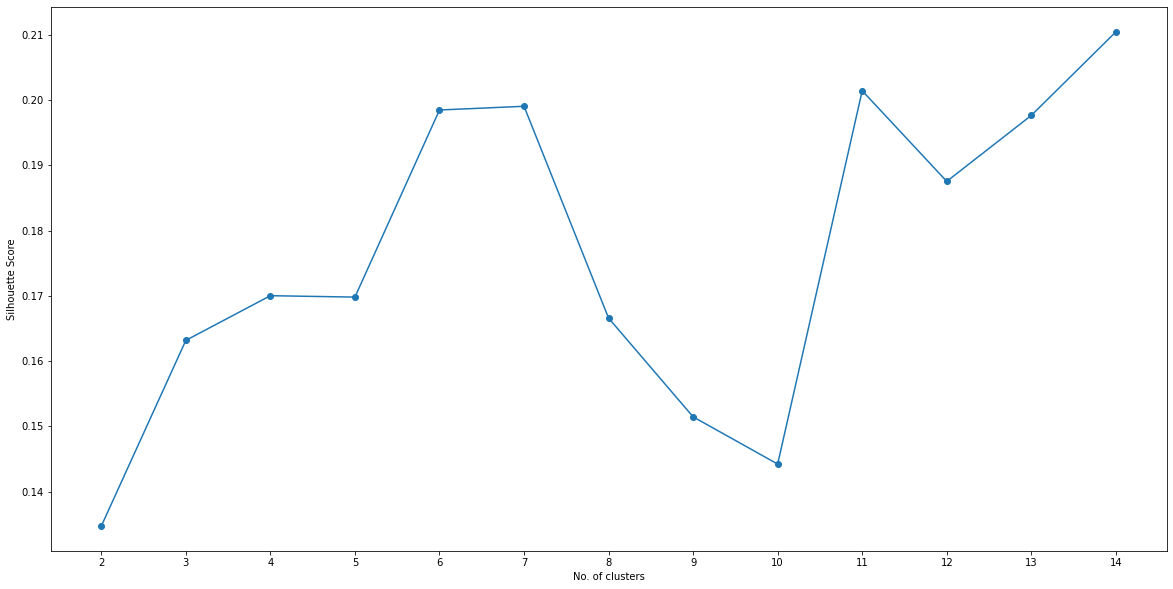

In [31]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [32]:
opt_value = 8

In [33]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [34]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [35]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399090,-2.285610,3,Tram Station,Supermarket,Clothing Store,Fast Food Restaurant,Hardware Store,Gym / Fitness Center,Pet Store,Monument / Landmark,Bowling Green,Coffee Shop
1,Barlow Moor,53.422201,-2.246093,5,Pub,Bar,Italian Restaurant,Deli / Bodega,Indian Restaurant,Bakery,Liquor Store,Restaurant,Persian Restaurant,Supermarket
2,"Belle Vue, Manchester",42.955853,-71.459019,7,Film Studio,Construction & Landscaping,Intersection,Business Service,English Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
3,Benchill,53.381730,-2.261250,3,Tram Station,Discount Store,Fast Food Restaurant,Sandwich Place,Warehouse Store,Market,Fish & Chips Shop,Coffee Shop,Bus Station,Supermarket
4,"Beswick, Manchester",53.478390,-2.200320,4,Tram Station,Soccer Field,Bus Stop,Track Stadium,Sporting Goods Shop,Café,Pub,Child Care Service,Chinese Restaurant,Supermarket


In [39]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [40]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Chorlton (ward),Bar,Pub,Pizza Place,Deli / Bodega,Spanish Restaurant,Falafel Restaurant,Café,Restaurant,Liquor Store,Fish Market
15,Chorlton-cum-Hardy,Bar,Pub,Pizza Place,Deli / Bodega,Spanish Restaurant,Falafel Restaurant,Café,Restaurant,Liquor Store,Fish Market
16,Chorlton-on-Medlock,Bar,Pub,Pizza Place,Deli / Bodega,Spanish Restaurant,Falafel Restaurant,Café,Restaurant,Liquor Store,Fish Market
17,Chorltonville,Bar,Pub,Pizza Place,Deli / Bodega,Spanish Restaurant,Falafel Restaurant,Café,Restaurant,Liquor Store,Fish Market


In [41]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Gorton,Park,Gym / Fitness Center,Hotel,Train Station,Fast Food Restaurant,Gymnastics Gym,Bakery,Racetrack,Sandwich Place,Bus Station
59,West Gorton,Park,Gym / Fitness Center,Hotel,Train Station,Fast Food Restaurant,Gymnastics Gym,Bakery,Racetrack,Sandwich Place,Bus Station
62,Woodhouse Park,Gym / Fitness Center,Fast Food Restaurant,Train Station,Gymnastics Gym,Go Kart Track,Park,Sandwich Place,Bus Station,Soccer Stadium,Bakery


In [42]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Blackley,Hotel,Building,Sandwich Place,Gym / Fitness Center,Shopping Mall,Supermarket,Flea Market,Park,Falafel Restaurant,Event Space
7,"Bradford, Manchester",Hotel,Building,Sandwich Place,Gym / Fitness Center,Shopping Mall,Supermarket,Flea Market,Park,Falafel Restaurant,Event Space
29,Harpurhey,Hotel,Sandwich Place,Gym / Fitness Center,Supermarket,Flea Market,Shopping Mall,Park,Yoga Studio,Event Space,Ethiopian Restaurant
39,"Moston, Manchester",Hotel,Sandwich Place,Gym / Fitness Center,Supermarket,Flea Market,Shopping Mall,Park,Yoga Studio,Event Space,Ethiopian Restaurant


In [43]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Clothing Store,Fast Food Restaurant,Hardware Store,Gym / Fitness Center,Pet Store,Monument / Landmark,Bowling Green,Coffee Shop
3,Benchill,Tram Station,Discount Store,Fast Food Restaurant,Sandwich Place,Warehouse Store,Market,Fish & Chips Shop,Coffee Shop,Bus Station,Supermarket
19,"Clayton, Manchester",Tram Station,Supermarket,Discount Store,Pub,Clothing Store,Sandwich Place,Pet Store,Gym / Fitness Center,Grocery Store,Shopping Mall
43,Newton Heath,Supermarket,Bus Stop,Tram Station,Park,Shoe Store,Yoga Studio,Electronics Store,Falafel Restaurant,Event Space,Ethiopian Restaurant
45,Northern Moor,Tram Station,Grocery Store,Convenience Store,Bowling Green,Chinese Restaurant,Lebanese Restaurant,Clothing Store,Monument / Landmark,Park,Gym / Fitness Center
51,"Peel Hall, Wythenshawe",Tram Station,Fast Food Restaurant,Bakery,Fish & Chips Shop,Supermarket,Tanning Salon,Discount Store,Coffee Shop,Market,Hotel
63,Wythenshawe,Tram Station,Fast Food Restaurant,Grocery Store,Park,Monument / Landmark,Bowling Green,Lebanese Restaurant,Electronics Store,Chinese Restaurant,Soccer Field


In [44]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Beswick, Manchester",Tram Station,Soccer Field,Bus Stop,Track Stadium,Sporting Goods Shop,Café,Pub,Child Care Service,Chinese Restaurant,Supermarket
6,Bradford-with-Beswick,Tram Station,Soccer Field,Bus Stop,Track Stadium,Sporting Goods Shop,Café,Pub,Child Care Service,Chinese Restaurant,Supermarket
14,Chorlton Park (ward),Park,Grocery Store,Pizza Place,Indian Restaurant,Café,Fish & Chips Shop,Spanish Restaurant,Falafel Restaurant,Bus Station,Pub
20,Collyhurst,Fast Food Restaurant,Coffee Shop,Grocery Store,Clothing Store,Pizza Place,Concert Hall,Pharmacy,Chinese Restaurant,Portuguese Restaurant,Pub
21,Crumpsall,Bakery,Pizza Place,Halal Restaurant,Coffee Shop,Tram Station,Asian Restaurant,Park,Sandwich Place,Supermarket,River
28,"Greenheys, Manchester",Music Venue,Café,Chinese Restaurant,Coffee Shop,Supermarket,Pub,Bar,Japanese Restaurant,Tanning Salon,Beer Bar
30,Highfield Country Park,Gym,Fast Food Restaurant,Grocery Store,Pizza Place,Bakery,Shopping Mall,Café,Supermarket,English Restaurant,Smoke Shop
32,Ladybarn,Fast Food Restaurant,Grocery Store,Park,Asian Restaurant,Supermarket,Pub,Bar,Sandwich Place,Burger Joint,Chinese Restaurant
33,Levenshulme,Grocery Store,Café,Park,Indian Restaurant,Farmers Market,Pub,Fast Food Restaurant,Sandwich Place,Discount Store,Bus Stop
34,Longsight,Supermarket,Pharmacy,Park,Market,Bus Stop,Café,Electronics Store,Restaurant,Dessert Shop,Bakery


In [45]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Pub,Bar,Italian Restaurant,Deli / Bodega,Indian Restaurant,Bakery,Liquor Store,Restaurant,Persian Restaurant,Supermarket
8,Brooklands (Manchester ward),Coffee Shop,Restaurant,Bar,Burger Joint,Italian Restaurant,Hotel,Brazilian Restaurant,Bike Shop,Plaza,Bookstore
9,Burnage,Pub,Bar,Park,Café,Supermarket,Bistro,Sandwich Place,Coffee Shop,Burger Joint,Indian Restaurant
10,Burnage (ward),Pub,Bar,Park,Café,Supermarket,Bistro,Sandwich Place,Coffee Shop,Burger Joint,Indian Restaurant
11,Castlefield,Pub,Indian Restaurant,Science Museum,Restaurant,Hotel,Steakhouse,Cocktail Bar,Bar,Hostel,Burger Joint
12,"Cheetham, Manchester",Italian Restaurant,Pub,Brewery,Bar,Café,Speakeasy,Persian Restaurant,Burger Joint,Sandwich Place,Mexican Restaurant
18,Circle Square Manchester,Bar,Pub,Coffee Shop,Café,Tea Room,Restaurant,Ethiopian Restaurant,Burrito Place,Park,Brewery
22,Didsbury,Italian Restaurant,Park,Pub,Grocery Store,Indian Restaurant,Café,Tea Room,Fish & Chips Shop,Burger Joint,Coffee Shop
23,Fallowfield,Pub,Gym / Fitness Center,Asian Restaurant,Fish & Chips Shop,Portuguese Restaurant,Chinese Restaurant,Park,Racetrack,Bed & Breakfast,Bar
24,"Glenbrook, Greater Manchester",Pub,Hotel,Supermarket,Golf Course,Discount Store,Park,Light Rail Station,Yoga Studio,Electronics Store,Falafel Restaurant


In [46]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Miles Platting,Men's Store,Thai Restaurant,Tram Station,Park,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room


In [47]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Belle Vue, Manchester",Film Studio,Construction & Landscaping,Intersection,Business Service,English Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
